# **Employee Performance predictor**
## By [Bhavneek Singh](https://bhavneek.netlify.app/), IIT Delhi

### Dataset Description

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

day : Day of the Week

quarter : A portion of the month. A month was divided into four quarters

department : Associated department with the instance

team no. : Associated team number with the instance 

noofworkers : Number of workers in each team 

noofstylechange : Number of changes in the style of a particular product

targetedproductivity : Targeted productivity set by the Authority for each team for each day. 

smv : Standard Minute Value, it is the allocated time for a task 

wip : Work in progress. Includes the number of unfinished items for products 

overtime : Represents the amount of overtime by each team in minutes

incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

idletime : The amount of time when the production was interrupted due to several reasons 

idlemen : The number of workers who were idle due to production interruption

actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-performance-prediction/train_dataset.csv
/kaggle/input/employee-performance-prediction/test_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/employee-performance-prediction/train_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [ ]:
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


### Dealing with NaN values
We can see that a column named 'wip' has many Nan values, from the documentation of dataset, wip means work in progress i.e number of unfinished items. So its safe to assume it can be filled with 0.

In [ ]:
df['wip'] = df['wip'].fillna(0)

In [ ]:
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


## Getting general idea of data

In [ ]:
num_cols=['no_of_workers','no_of_style_change','idle_men','idle_time','incentive','over_time','wip','smv','targeted_productivity','actual_productivity']

<AxesSubplot:>

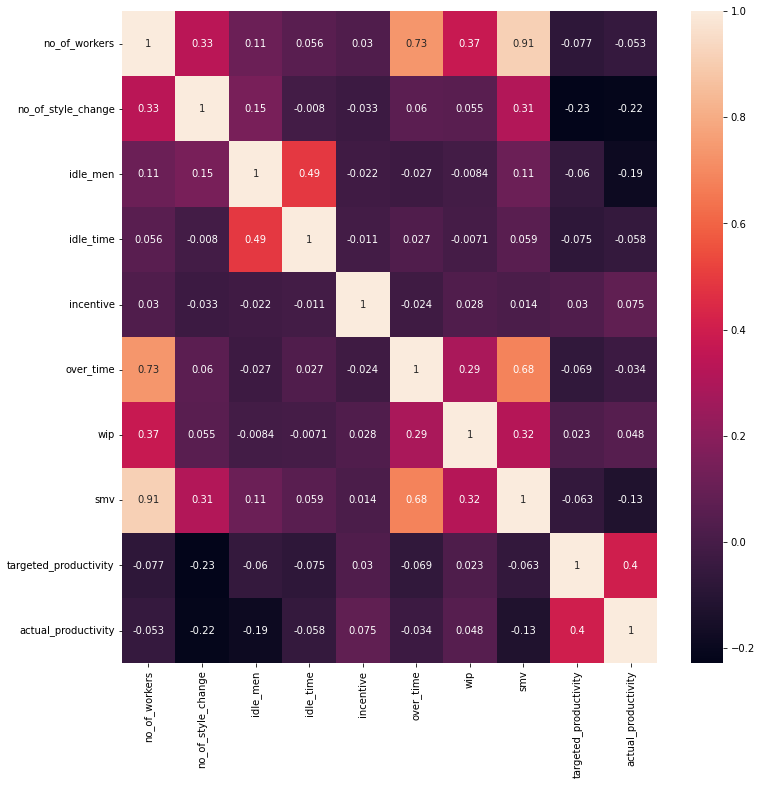

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(),annot=True)

<AxesSubplot:xlabel='targeted_productivity', ylabel='actual_productivity'>

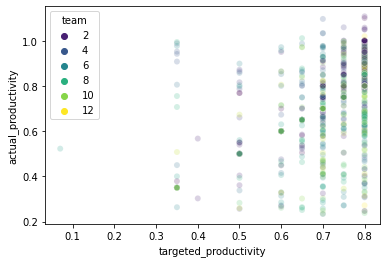

In [ ]:
sns.scatterplot(x='targeted_productivity',  y='actual_productivity',data=df, hue='team', palette='viridis', alpha=0.2)

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

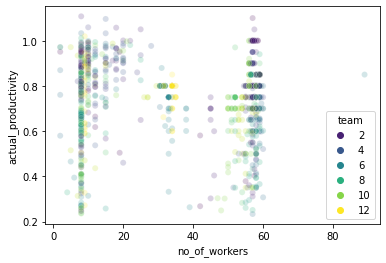

In [ ]:
sns.scatterplot(x='no_of_workers',  y='actual_productivity',data=df, hue='team', palette='viridis', alpha=0.2)

<AxesSubplot:xlabel='wip', ylabel='actual_productivity'>

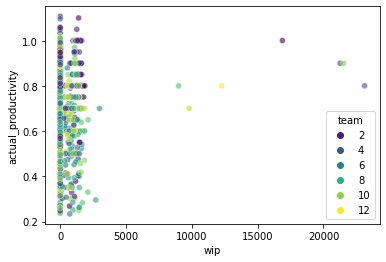

In [ ]:
sns.scatterplot(x='wip',  y='actual_productivity',data=df, hue='team', palette='viridis', alpha=0.6)

### Initial Asessments
Plotting a correlation matrix and some scatterplots, we can see that there seems to be no apparent linear/polynomial pattern with singular feature. As many of the features we are dealing with are discrete, algebra based regression models may or may not perform as well as tree based regression methods.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separating Label
X = df.drop('actual_productivity',axis=1)
y = df['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,7):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

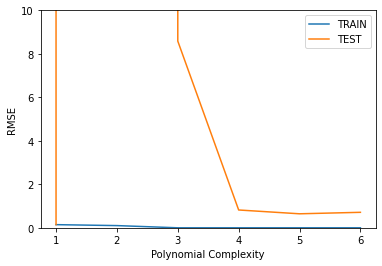

In [ ]:
# Plotting errors
plt.plot(range(1,7),train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,10)
plt.legend()

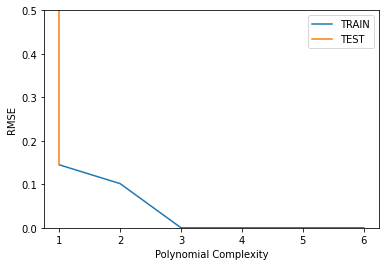

In [ ]:
# Plotting errors
plt.plot(range(1,7),train_rmse_errors,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,0.5)
plt.legend()

In [ ]:
test_rmse_errors[0]

0.14658074389524323

#### The minimum RMSE error we get from here is from linear regression i.e 0.146

# SVM Regression

In [ ]:
# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# SVM REGRESSION #
from sklearn.svm import SVR,LinearSVR # SVM Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
param_g = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_g)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 0.5, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)
MAE=mean_absolute_error(y_test,grid_preds)
MSE=np.sqrt(mean_squared_error(y_test,grid_preds))

In [ ]:
MSE

0.1461277025000012

### Inference
Very Similar to linear Regression, with RMSE 0.146

# Random forest regresssor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

In [ ]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13457555919416928
RMSE : 0.1390969106692785
RMSE : 0.13700447245624195


#### Minimum RMSE error is 0.1370

# Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13601465608856553


#### By far our most accurate model

# Inference
We tried various kind of regression methods, least RMSE we could get was 0.1360, mean actual productivity is 0.7365

In [ ]:
0.1360/0.7365*100

18.46571622539036

Our error is about 18% off from the average, which is pretty inaccurate.

Although our features correlate to the productivity of team in a broad sense (as seen from the heatmap) we still need more data, to train/test our model. For now data seems fairly random and we cannot predict from it accurately.